# The steps for the code 
1. Load and describe the data
2. Exploratory Data Analysis
2.1 Exploratory data analysis – numerical
2.2 Exploratory data analysis - visual
2.3 Analyse the target variable
2.4 compute the correlation
3. Pre-process the data
3.1 Dealing with missing values
3.2 Treatment of categorical values
3.3 Remove the outliers
3.4 Normalise the data
4. Split the data
5. Choose a Baseline algorithm
5.1 defining / instantiating the baseline model
5.2 fitting the model we have developed to our training set
5.3 Define the evaluation metric
5.4 predict scores against our test set and assess how good it is
6. Refine our dataset with additional columns
7. Test Alternative Models
8. Choose the best model and optimise its parameters
   Gridsearch 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# rather than importing the whole sklearn library, we will import certain modules 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [6]:
# we load the dataset and save it as the variable boston
boston = load_boston()
boston

# take a look at the details provided by this dataset
boston.keys()

# the info at the .DESCR key will tell us more
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
# create a dataframe
boston_X = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# Get a summary statistics on all numerical variables
boston_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
boston_X.shape

(506, 13)

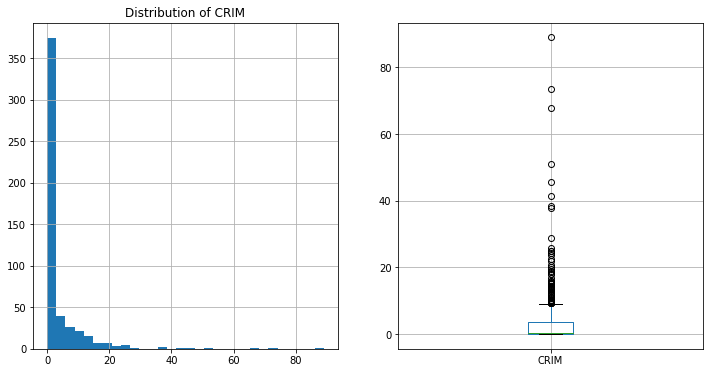

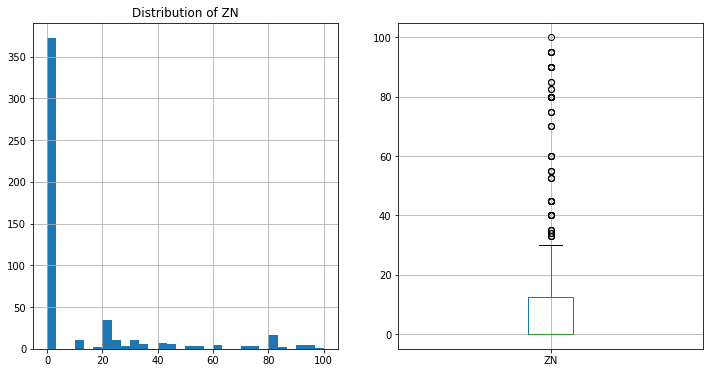

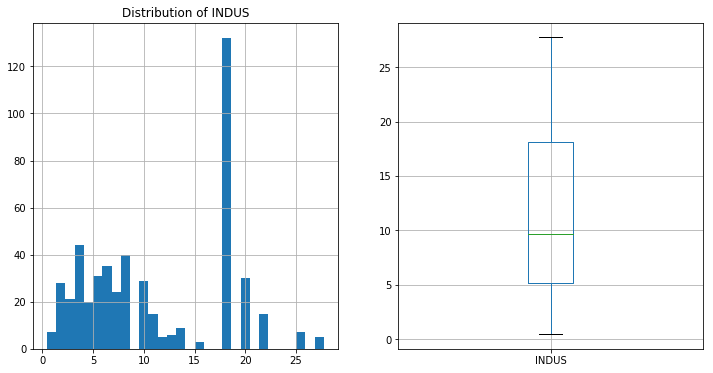

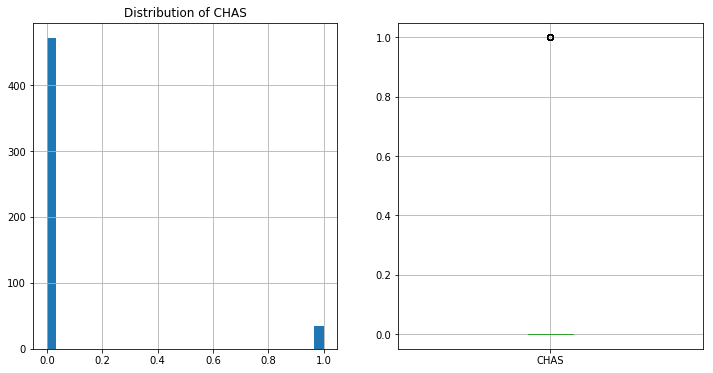

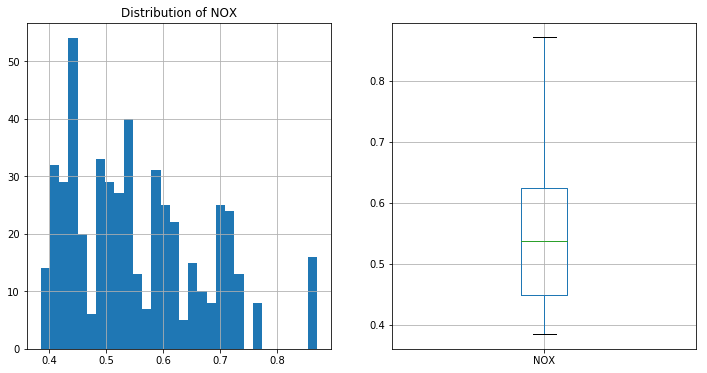

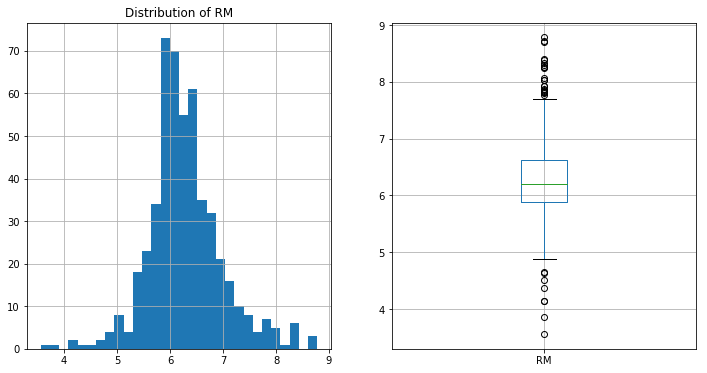

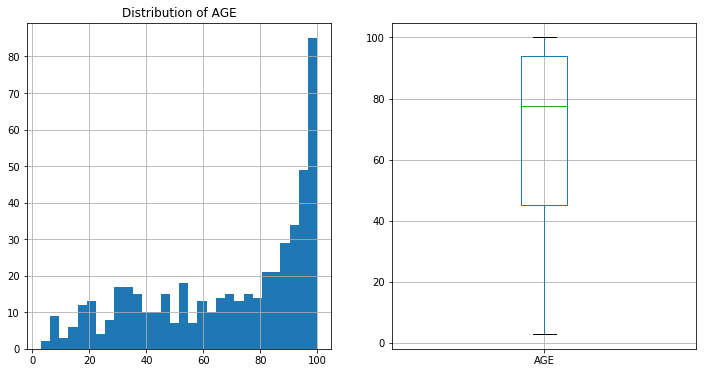

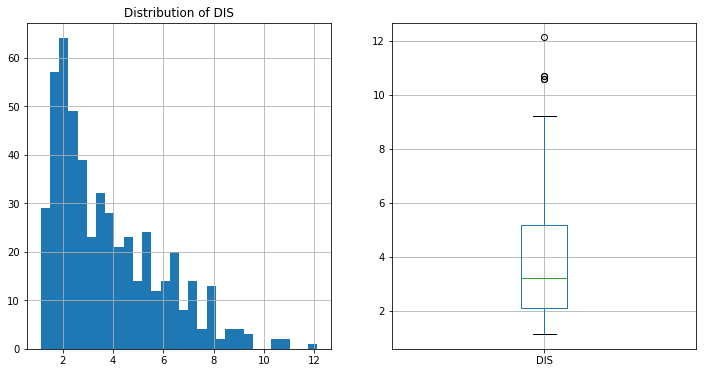

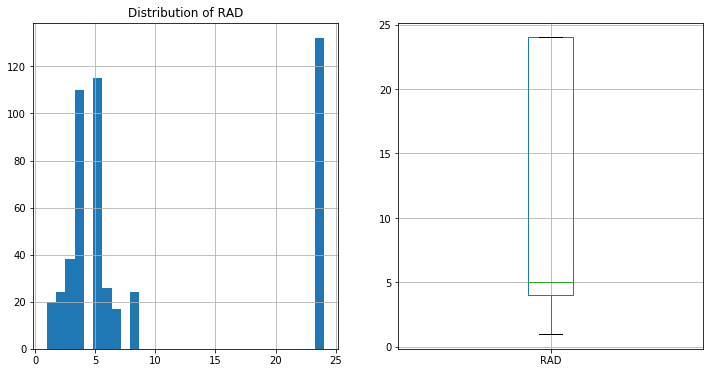

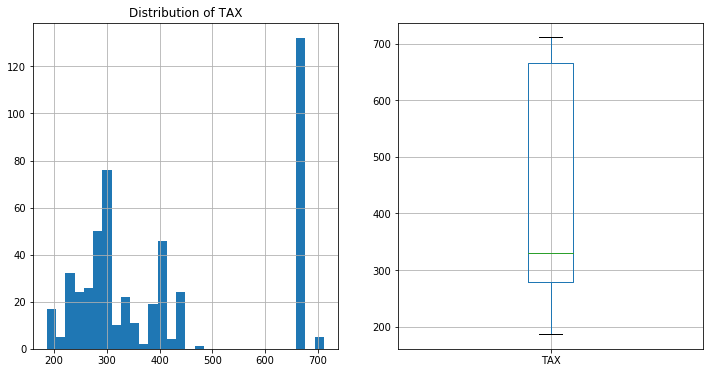

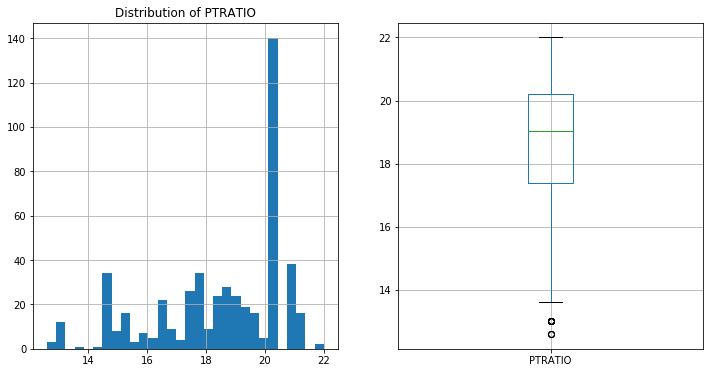

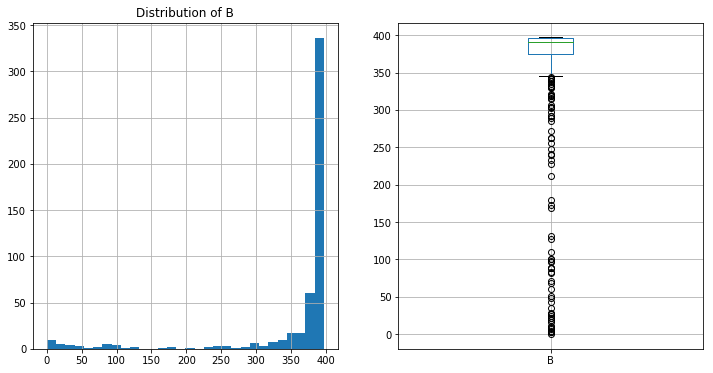

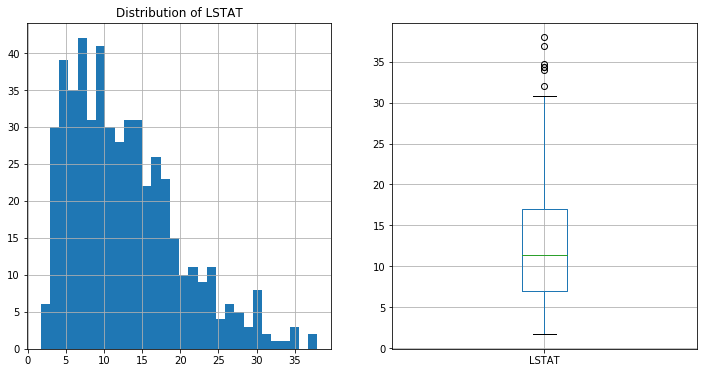

In [11]:
"""* For each feature, we can see the `count`, or number of data entries, the `mean` value, and the `standard deviation`, `min`, `max` and `quartile` values. 
* We can see that the range of values for each feature differs quite a lot, so we can start to think about whether to apply normalization to the data. 
* We can also see that the `CHAS` faeture is either a `(1,0)` value. If we look back at our description, we can see that this is an example of a `categorical` variable. These are values used to describe non-numeric data. In this case,  a `1` indicates the house borders near the river, and a `0` that it doesn't.
"""

# we can build on this analysis by plotting the distribution and boxplots for each column

# we loop through all the columns
for col in boston_X.columns:
    # and for each column we create space for one row with 2 charts 
    f, axes = plt.subplots(1, 2, figsize=(12, 6))
    # our first chart is a histogram and we set the title 
    boston_X[col].hist(bins = 30, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    # our second column is the boxplot 
    boston_X.boxplot(column = col, ax = axes[1])
    # we then use this to command to display the charts
    plt.show()

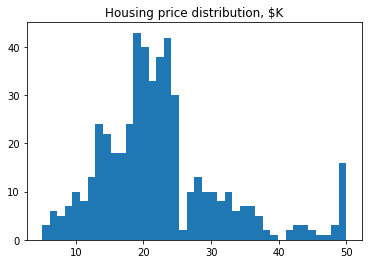

In [12]:

"""* A `histogram` tells is the number of times, or frequency, a value occurs within a `bin`, or bucket, that splits the data (and which we defined). A histogram shows the frequency with which values occur within each of these bins, and can tell us about the distribution of data. 
* A `boxplot` captures within the box the `interquartile range`, the range of values from Q1/25th percentile to Q3/75th percentile, and the median value. It also captures the `min` and `max` values of each feature.
* Together, these charts show us the distribution of values for each feature. We can start to make judgements about how to treat the data, for example whether we want to deal with outliers; or whether we want to normalize the data.
"""

# we can now look at our target variable 
boston_y = boston.target
# we can plot a histogram in a slightly different way 
plt.hist(boston_y, bins = 40)
plt.title('Housing price distribution, $K')
plt.show()

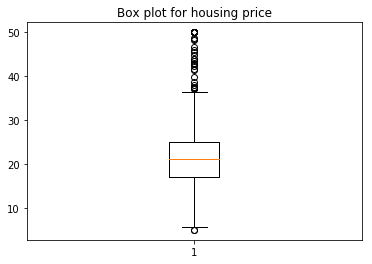

In [13]:
# and the same for the boxplot
plt.boxplot(boston_y)
plt.title('Box plot for housing price')
plt.show()

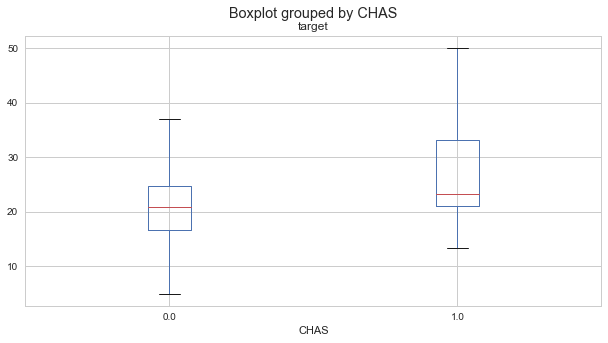

In [20]:
# another thing we can do is plot a boxplot of one variable against the target variable 
# it is interesting to see how house value distribution differs by CHAS, the categorical variable 

# here we create a grouped dataframe that includes the target variable
grouped_df = boston_X.copy()   # note we create a copy of the data here so that any changes don't impact the original data
grouped_df['target'] = boston_y.copy()
grouped_df.head()

# we then plot it here
f, axes = plt.subplots(1, 1, figsize=(10, 5))   
grouped_df.boxplot(column='target', by = 'CHAS', ax = axes)
plt.show()


#The `interquartile range`for houses next to the river is higher than for those houses not next to the river, and the `min` and `max` values differ too.

#This suggests this could be an important variable for us to include in our model, given that as it differs, the target value distribution changes.


In [24]:
# Process the data.
# check missing data
boston_X.isnull().values.any()


False

In [26]:
# removing outliers

# define the columns where we have identified there could be otliers
numeric_column = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
# define a function to return a list of index values for outliers
def get_outliers(data,columns):
    outlier_idxs = []
    for col in columns:
        elements = data[col]
        mean = elements.mean()
        sd = elements.std()
        outliers_mask = data[(data[col] > mean+3*sd) | (data[col] <mean-3*sd)].index
        outlier_idxs += [x for x in outliers_mask]
        return list(set(outlier_idxs))
    
# call the function to get the outliers
boston_outliers = get_outliers(boston_X,numeric_column)

# drop the outliers
boston_X = boston_X.drop(boston_outliers, axis=0)
boston_y = pd.DataFrame(boston_y).drop(boston_outliers,axis=0).values.ravel()


In [30]:
# this function loops through columns in a data set and defines a predefined scaler to each
def scale_numeric(data, numeric_column, scaler):
    for col in numeric_column:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

# we can now define the scaler we want to use and apply it to our dataset 

# a good exercise would be to research waht StandardScaler does - it is from the scikit learn library 
scaler = StandardScaler()
boston_X = scale_numeric(boston_X, numeric_column, scaler)

# here we can see the result 
boston_X[0:10]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.542600,0.275323,-1.272087,0.0,-0.127724,0.403029,-0.105154,0.123460,-0.970320,-0.649259,-1.442122,0.433966,-1.073299
1,-0.538461,-0.492566,-0.577286,0.0,-0.724546,0.182871,0.381796,0.540837,-0.853657,-0.973599,-0.289350,0.433966,-0.479093
2,-0.538465,-0.492566,-0.577286,0.0,-0.724546,1.275084,-0.250883,0.540837,-0.853657,-0.973599,-0.289350,0.387213,-1.208995
3,-0.537463,-0.492566,-1.291063,0.0,-0.819692,1.007749,-0.794703,1.061951,-0.736993,-1.093725,0.125647,0.407890,-1.364689
4,-0.530231,-0.492566,-1.291063,0.0,-0.819692,1.220759,-0.496135,1.061951,-0.736993,-1.093725,0.125647,0.433966,-1.023306
5,-0.537960,-0.492566,-1.291063,0.0,-0.819692,0.195737,-0.336188,1.061951,-0.736993,-1.093725,0.125647,0.402031,-1.040446
6,-0.526437,0.040690,-0.460513,0.0,-0.248818,-0.401835,-0.055393,0.823212,-0.503667,-0.559165,-1.488233,0.419032,-0.009155
7,-0.515344,0.040690,-0.460513,0.0,-0.248818,-0.173099,0.993148,1.008797,-0.503667,-0.559165,-1.488233,0.433966,0.950716
8,-0.502195,0.040690,-0.460513,0.0,-0.248818,-0.946512,1.131769,1.071420,-0.503667,-0.559165,-1.488233,0.315992,2.490511
9,-0.510318,0.040690,-0.460513,0.0,-0.248818,-0.413272,0.630602,1.314109,-0.503667,-0.559165,-1.488233,0.316911,0.657898


In [31]:

"""###  : Split the data
* In order to train our model and see how well it performs, we need to split our data into training and testing sets.
* We can then train our model on the training set, and test how well it has generalised to the data on the test set.
* There are a number of options for how we can split the data, and for what proportion of our original data we set aside for the test set.
"""

# a common way for splitting our dataset is using train_test_split 

# as an exercise, go to the scikit learn documentation to learn more about this function and the parameters available 
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(boston_X, boston_y, test_size = 0.2, random_state = 5)

# get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features: ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features: ', X_test.shape[1])

Training Set:
Number of datapoints:  398
Number of features:  13


Test Set:
Number of datapoints:  100
Number of features:  13


In [32]:

"""###  Choose a Baseline algorithm
# linear regression is a fairly simple algorithm compared to more complicate regression options, so provides a good baseline
"""
### Train and Test the Model"""

lm = LinearRegression()

# fitting the model to the data means to train our model on the data
# the fit function takes both the X and y variables of the training data 
lm.fit(X_train, Y_train)

# from this, we can generate a set of predictions on our unseen features, X_test
Y_pred = lm.predict(X_test)


Mean squared error:  17.736724883353748
Mean absolute error:  3.206411677278041
R^2 :  0.7371118967159696


3.206411677278041

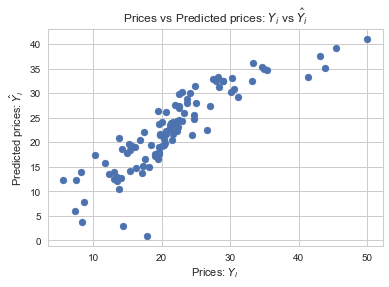

In [33]:
def evaluate(Y_test, Y_pred):
    # this block of code returns all the metrics we are interested in 
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    msa = metrics.mean_absolute_error(Y_test, Y_pred)
    r2 = metrics.r2_score(Y_test, Y_pred)

    print("Mean squared error: ", mse)
    print("Mean absolute error: ", msa)
    print("R^2 : ", r2)
    
    # this creates a chart plotting predicted and actual 
    plt.scatter(Y_test, Y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

evaluate(Y_test, Y_pred)

# we can explore how metrics are dervied in a little more detail by looking at MAE
# here we will implement MAE using numpy, building it up step by step

# with MAE, we get the absolute values of the error - as you can see this is of the difference between the actual and predicted values
np.abs(Y_test - Y_pred)

# we will then sum them up 
np.sum(np.abs(Y_test - Y_pred))

# then divide by the total number of predictions/actual values
# as you will see, we get to the same score implemented above 
np.sum(np.abs(Y_test - Y_pred))/len(Y_test)

In [34]:
"""### : Refine our dataset
* This step allows us to add or modify features of the datatset. We might do this if, for example, some combination of features better represents the problems space and so is an indicator of the target variable. 
* Here, we create one additional feature as an example, but you should reflect on our EDA earlier and see whether there are other features that can be added to our dataset.
"""

# here we are using pandas functionality to add a new column called LSTAT_2, which will feature values that are the square of LSTAT values
boston_X['LSTAT_2'] = boston_X['LSTAT'].map(lambda x: x**2)

# we can run our train_test_split function and see that we have an additional features
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(boston_X, boston_y, test_size = 0.2, random_state = 5)

print('Number of features after dataset refinement: ', X_train.shape[1])

Number of features after dataset refinement:  14


Mean squared error:  10.501221994197893
Mean absolute error:  2.6626534642220743
R^2 :  0.8443542226439928


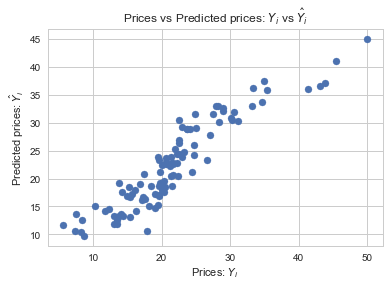

In [35]:
# we can now run the same code as before on our refined dataset to see if things have improved 
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

evaluate(Y_test, Y_pred)